## Data preprocessing

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.DataFrame([],columns=['bibcode', 'label_studio_id', 'ner_ids', 'ner_tags', 'section',
       'tokens', 'unique_id'])

In [ ]:
with open("/content/WIESP2022-NER-TRAINING.jsonl", 'r') as f:
    wiesp_dev_json = [json.loads(l) for l in list(f)]

In [ ]:
for i in wiesp_dev_json:
  df=df.append(pd.DataFrame(i))

In [ ]:
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S


In [ ]:
d = dict(df['ner_tags'].value_counts())

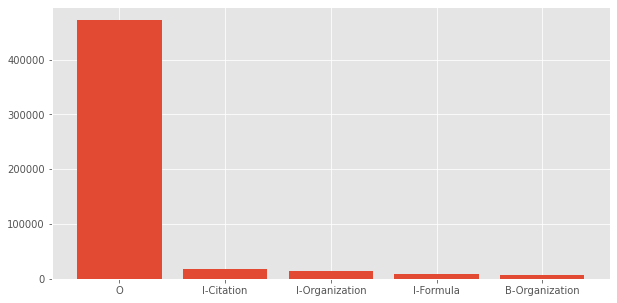

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(d.keys())[:5],list(d.values())[:5],)
plt.show()

In [ ]:
sent=list(df['unique_id'].unique())

In [ ]:
print(sent[0])

fulltext_487_2019MNRAS.486.5558S


In [ ]:
words = set(list(df['tokens'].values))
words.add('PAD')
n_words = len(words)
n_words

48992

In [ ]:
tags = list(set(df["ner_tags"].values))
n_tags = len(tags)
n_tags

63

In [ ]:
agg_func = lambda s: [(w, t) for w, t in zip(s["tokens"].values.tolist(),s["ner_tags"].values.tolist())]

In [ ]:
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S


In [ ]:
sentences = [df.groupby("unique_id").apply(agg_func)[i] for i in sent]

In [ ]:
token_sentences = pd.DataFrame(df[['unique_id','tokens']].groupby('unique_id')['tokens'].apply(list))

In [ ]:
ner_tags_sentences = pd.DataFrame(df[['unique_id','ner_tags']].groupby('unique_id')['ner_tags'].apply(list))

In [ ]:
sentences.head()

,0
unique_id,
acknowledgments_0_2019MNRAS.489..268S,"[tokens, ner_tags]"
acknowledgments_1000_2015MNRAS.446.1750F,"[tokens, ner_tags]"
acknowledgments_1002_2016MNRAS.455.2945M,"[tokens, ner_tags]"
acknowledgments_1003_2017MNRAS.464.3972L,"[tokens, ner_tags]"
acknowledgments_1005_2019MNRAS.483.4901B,"[tokens, ner_tags]"


In [ ]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 795 words


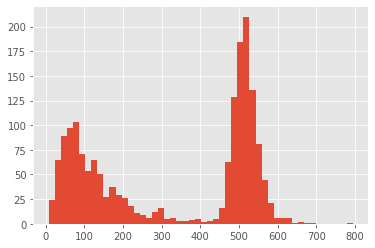

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins= 50)
plt.show()

In [ ]:
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}
print(words2index['combine'])
print(tags2index['B-Instrument'])

26589
9


In [ ]:
df['tokens_idx'] = df['tokens'].map(words2index)
df['ner_tags_idx'] = df['ner_tags'].map(tags2index)
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,tokens_idx,ner_tags_idx
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,20267,18
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S,44358,18
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,23277,18
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,29074,18
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,42667,18


In [ ]:
for w in sentences[:5]:
  print(w)

['ACKNOWLEDGEMENTS', 'We', 'acknowledge', 'helpful', 'comments', 'from', 'the', 'referee,', 'which', 'helped', 'to', 'clarify', 'several', 'aspects', 'of', 'the', 'observations', 'and', 'analysis', 'presented', 'in', 'this', 'paper.', 'We', 'thank', 'STScI', 'science', 'and', 'technical', 'staff', 'members', 'Peter', 'McCullough', 'and', 'Amber', 'Armstrong', 'for', 'special', 'assistance', 'in', 'planning', 'the', 'DD', 'time', 'observations', 'and', 'Joe', 'DePasquale', 'for', 'producing', 'the', 'colour', 'HST', 'image', 'in', 'Fig.', '2', 'and', 'the', 'similar', 'image', 'superposed', 'on', 'the', 'Chandra', 'X-ray', 'image', 'in', 'Fig.', '6', '.', 'We', 'thank', 'both', 'Kenji', 'Hamaguchi', 'and', 'Mike', 'Corcoran', 'for', 'discussions', 'over', 'many', 'years', 'concerning', 'the', 'X-ray', 'emission', 'from', 'η', 'Car’s', 'outer', 'shell.', 'JM', 'appreciates', 'helpful', 'discussions', 'with', 'John', 'Raymond', 'and', 'Pat', 'Hartigan.', 'Based', 'on', 'observations', 'ma

In [ ]:
max_len = 800
X = [s for s in token_sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PAD")
    new_X.append(new_seq)
new_X[15]

IndexError: ignored

In [ ]:
len(new_X),len(new_X[0]),max([len(i) for i in new_X])

(1753, 800, 800)

In [ ]:
ner_tags_sentences['ner_tags'][0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Organization',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'B-Wavelength',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Organization',
 'I-Organization',
 'O',
 'B-Organization',
 'I-Organization',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Wavelength',
 'O',
 'O',
 'B-CelestialObject',
 'I-CelestialObject',
 'O',
 'O',
 'B-Person',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'I-Telescope',
 'I-Telescope',
 'I-Telescope',
 'O',
 'O',
 'O',
 'B-Organization',
 'I-Organization',
 'I-Organi

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
y = [[tags2index[tag] for tag in s] for s in ner_tags_sentences['ner_tags']]
# y = []
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]

array([29, 18, 18, 29, 37, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 29,
       37, 18, 29, 37, 18, 18, 18, 18, 18, 18, 18, 18, 18, 29, 29, 18, 29,
       18, 18, 18, 18, 45, 55, 55, 55, 55, 55, 55, 55, 45, 18, 18, 18, 29,
       37, 18, 18, 61, 23, 23, 23, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 29, 18, 29, 37, 18, 18, 18, 18, 18, 58, 36, 57, 57, 57, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 61, 18, 18, 14, 12, 12,
       12, 12, 12, 12, 29, 18, 18, 18, 18, 18, 18, 61, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 18, 18, 18, 14, 18, 14, 18, 18, 18, 14, 12, 12,
       18, 18, 18, 18, 18, 18, 61, 23, 23, 23, 23, 18, 18, 14, 18, 18, 18,
       18, 18, 18, 61, 23, 18, 18, 14, 12, 12, 14, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 60, 52, 52, 52, 52, 52, 18, 61, 23,
       23, 23, 23, 23, 18, 18, 18, 61, 23, 23, 23, 23, 23, 23, 23, 23, 18,
       18, 18, 14, 18, 18, 18, 18, 60, 52, 18, 61, 23, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [ ]:
import numpy as np
depth=n_tags
# y = tf.one_hot(y, depth)
y2 = np.eye(depth)[y]

In [ ]:
from tensorflow import feature_column as fc

# f = fc.embedding_column(
#     fc.categorical_column_with_identity(key='vid', num_buckets=1500000000),
#     dimension=10)
street_voc = tf.feature_column.categorical_column_with_identity(
        key='STREETW', num_buckets= __getNumberOfWords(data, 'STREETPRO') + 1)

In [ ]:
n_tags

63

In [ ]:
batch_size=1024

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tok = Tokenizer(oov_token="<OOV>")

In [ ]:
sentences = token_sentences['tokens']

In [ ]:
tok.fit_on_texts(sentences)
X2 = tok.texts_to_sequences(sentences)
padded_X = pad_sequences(X2,padding="post",maxlen=800)

In [ ]:
import json
# json_ob= json.dumps(tok.word_index,indent=4)
with open("training_word_index_new.json","w") as outfile:
  json.dump(tok.word_index, outfile)

In [ ]:
padded_X.shape

(1753, 800)

In [ ]:
# from keras.utils import to_categorical
# y2 = [tf.keras.utils.to_categorical(i, num_classes=n_tags) for i in y]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(new_X_padded, y, test_size=0.1, random_state=2021)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(padded_X, y2, test_size=0.1, random_state=2021)

In [ ]:
# y_tr, y_val = y_tr[:1213*batch_size], y_tr[-135*batch_size:]
import tensorflow as tf
y_tr = tf.convert_to_tensor(y_tr)
y_val = tf.convert_to_tensor(y_val)

# y_tr = tf.reshape(y_tr, (y_tr.shape[0], y_tr.shape[1], y_tr.shape[2],1))
# y_val = tf.reshape(y_val,(y_val.shape[0], y_val.shape[1], y_tr.shape[2],1))

In [ ]:
X_tr = tf.convert_to_tensor(X_tr)
X_val = tf.convert_to_tensor(X_val)

In [ ]:
y_tr.shape,y_val.shape

(TensorShape([1577, 800, 63]), TensorShape([176, 800, 63]))

In [ ]:
X_tr.shape,X_val.shape

(TensorShape([1577, 800]), TensorShape([176, 800]))

In [ ]:
batch_size=32
train_data = tf.data.Dataset.from_tensor_slices((X_tr,y_tr)).batch(batch_size)
val_data =   tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(batch_size)

In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 800), dtype=tf.string, name=None),
 TensorSpec(shape=(None, 800), dtype=tf.int32, name=None))

## Glove and model training

In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-07-29 09:25:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-29 09:25:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-29 09:25:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [ ]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
import numpy as np
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# from numpy import asarray
# from numpy import savetxt
# savetxt('embeddings_index.csv', embeddings_index, delimiter=',',fmt="%s")

In [ ]:
len(list(word_index.keys()))

157

In [ ]:
max_length=100
word_index=tok.word_index
embedding_matrix = np.zeros((len(tok.word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

In [ ]:
n_tokens = 63
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Input((800,)),
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150,return_sequences=True)),
    # Dense(128, activation='relu'),
   Dense(n_tokens, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          4575500   
                                                                 
 bidirectional (Bidirectiona  (None, 800, 300)         301200    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 800, 300)         541200    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 800, 63)           18963     
                                                                 
Total params: 5,436,863
Trainable params: 5,436,863
Non-trainable params: 0
_________________________________________________________________


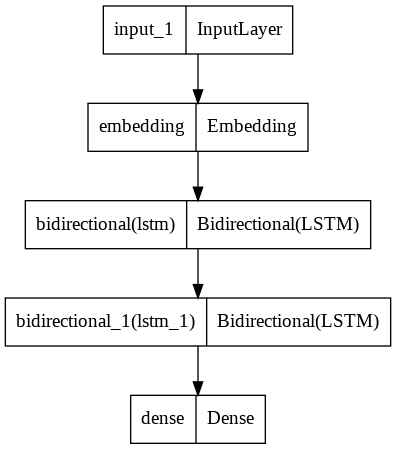

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
%load_ext tensorboard
%rm -rf logs

log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 10),
            TensorBoard(log_dir=log_folder)
            ]
num_epochs = 10
history = model.fit(X_tr, y_tr, epochs=num_epochs, validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/10
50/50 [==============================] - 303s 6s/step - loss: 0.8122 - accuracy: 0.9096 - val_loss: 0.3858 - val_accuracy: 0.9242
Epoch 2/10
50/50 [==============================] - 287s 6s/step - loss: 0.2937 - accuracy: 0.9371 - val_loss: 0.2550 - val_accuracy: 0.9432
Epoch 3/10
50/50 [==============================] - 284s 6s/step - loss: 0.2081 - accuracy: 0.9510 - val_loss: 0.2031 - val_accuracy: 0.9542
Epoch 4/10
50/50 [==============================] - 287s 6s/step - loss: 0.1689 - accuracy: 0.9594 - val_loss: 0.1770 - val_accuracy: 0.9585
Epoch 5/10
50/50 [==============================] - 286s 6s/step - loss: 0.1438 - accuracy: 0.9643 - val_loss: 0.1602 - val_accuracy: 0.9615
Epoch 6/10
50/50 [==============================] - 286s 6s/step - loss: 0.1245 - accuracy: 0.9682 - val_loss: 0.1485 - val_accuracy: 0.9639
Epoch 7/10
50/50 [==============================] - 283s 6s/step - loss: 0.1090 - accuracy: 0.9719 - val_loss: 0.1394 - val_accuracy: 0.9659
Epoch 8/10
50

In [ ]:
history.history

{'accuracy': [0.9334725737571716,
  0.9458948969841003,
  0.9554153680801392,
  0.9608465433120728,
  0.9659147262573242,
  0.9699690937995911,
  0.973298192024231,
  0.9767025709152222,
  0.9800657629966736,
  0.9822907447814941],
 'loss': [0.33439427614212036,
  0.23264430463314056,
  0.18514850735664368,
  0.15713165700435638,
  0.13359859585762024,
  0.11459940671920776,
  0.10176566988229752,
  0.08771564066410065,
  0.0760321244597435,
  0.06727554649114609],
 'val_accuracy': [0.9412428736686707,
  0.9529403448104858,
  0.9603906273841858,
  0.9646590948104858,
  0.9688210487365723,
  0.9707457423210144,
  0.9730823636054993,
  0.9748082160949707,
  0.9759871959686279,
  0.9755184650421143],
 'val_loss': [0.26252374053001404,
  0.19726237654685974,
  0.162498340010643,
  0.14505882561206818,
  0.12670987844467163,
  0.11636484414339066,
  0.1067274734377861,
  0.09938541054725647,
  0.0954926535487175,
  0.09480059891939163]}

In [ ]:
model.save_weights("10epochs_glove_embeddings.h5")

In [ ]:
model.weights[0]

<tf.Variable 'embedding/embeddings:0' shape=(45755, 100) dtype=float32, numpy=
array([[ 0.01449303,  0.01366468,  0.01571373, ..., -0.00738354,
         0.0109899 ,  0.01564102],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04311869, -0.23144376,  0.7724704 , ..., -0.16317604,
         0.8550257 ,  0.32174668],
       ...,
       [-0.05088813,  0.05933478,  0.0443586 , ..., -0.0467894 ,
         0.05384191,  0.0554083 ],
       [-0.04405241,  0.04896298,  0.04176657, ..., -0.03685854,
         0.04123592,  0.04414182],
       [ 0.03333949, -0.03438727, -0.03096041, ...,  0.02885388,
        -0.02427114, -0.03518065]], dtype=float32)>

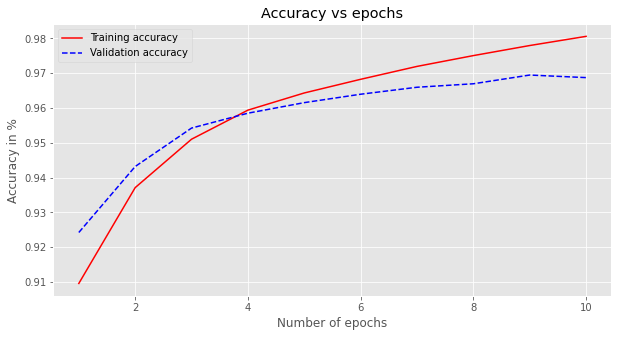

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
x1=np.array([i for i in range(1,11)])


l1=plt.plot(x1,history.history["accuracy"], color="r")
l2=plt.plot(x1,history.history["val_accuracy"], color="b", linestyle="dashed")
plt.title("Accuracy vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy in %")
plt.legend(["Training accuracy","Validation accuracy"])
plt.show()

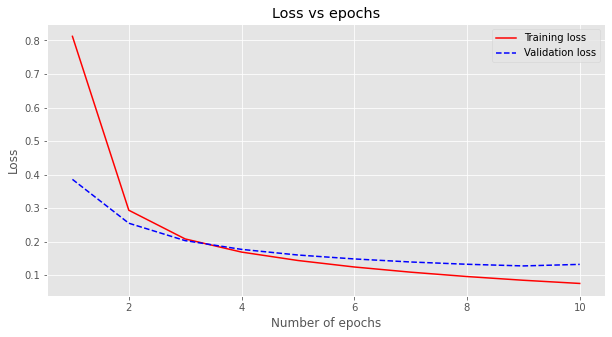

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
x1=np.array([i for i in range(1,11)])


l1=plt.plot(x1,history.history["loss"], color="r")
l2=plt.plot(x1,history.history["val_loss"], color="b", linestyle="dashed")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(["Training loss","Validation loss"])
plt.show()

## Validation data load

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.DataFrame([],columns=['bibcode', 'label_studio_id', 'section',
       'tokens', 'unique_id'])

In [ ]:
with open("/content/WIESP2022-NER-VALIDATION-NO-LABELS (1).jsonl", 'r') as f:
    wiesp_dev_json = [json.loads(l) for l in list(f)]

In [ ]:
for i in wiesp_dev_json:
  df=df.append(pd.DataFrame(i))

In [ ]:
df.head()

,bibcode,label_studio_id,section,tokens,unique_id
0,2016A&A...586A.140P,1778,fulltext,that,fulltext_1778_2016A&A...586A.140P
1,2016A&A...586A.140P,1778,fulltext,gas,fulltext_1778_2016A&A...586A.140P
2,2016A&A...586A.140P,1778,fulltext,outside,fulltext_1778_2016A&A...586A.140P
3,2016A&A...586A.140P,1778,fulltext,"halos,",fulltext_1778_2016A&A...586A.140P
4,2016A&A...586A.140P,1778,fulltext,not,fulltext_1778_2016A&A...586A.140P


In [ ]:
sent=list(df['unique_id'].unique())

In [ ]:
print(sent[0])

fulltext_1778_2016A&A...586A.140P


In [ ]:
words = set(list(df['tokens'].values))
words.add('PAD')
n_words = len(words)
n_words

42035

In [ ]:
# tags = list(set(df["ner_tags"].values))
# n_tags = len(tags)
# n_tags

In [ ]:
sentences_test = pd.DataFrame(df[['unique_id','tokens']].groupby('unique_id')['tokens'].apply(list))["tokens"]

In [ ]:
largest_sen = max(len(sen) for sen in sentences_test)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 913 words


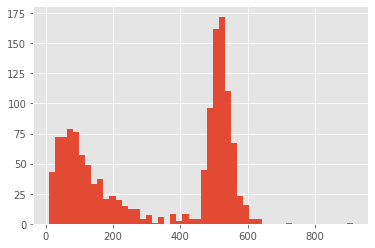

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences_test], bins= 50)
plt.show()

In [ ]:
words2index_test = {w:i for i,w in enumerate(words)}
# tags2index_test = {t:i for i,t in enumerate(tags)}
print(words2index_test['combine'])
# print(tags2index_test['B-Instrument'])

22785


In [ ]:
df['tokens_idx'] = df['tokens'].map(words2index_test)
df.head()

,bibcode,label_studio_id,section,tokens,unique_id,tokens_idx
0,2016A&A...586A.140P,1778,fulltext,that,fulltext_1778_2016A&A...586A.140P,12718
1,2016A&A...586A.140P,1778,fulltext,gas,fulltext_1778_2016A&A...586A.140P,13151
2,2016A&A...586A.140P,1778,fulltext,outside,fulltext_1778_2016A&A...586A.140P,9416
3,2016A&A...586A.140P,1778,fulltext,"halos,",fulltext_1778_2016A&A...586A.140P,28525
4,2016A&A...586A.140P,1778,fulltext,not,fulltext_1778_2016A&A...586A.140P,42027


In [ ]:
sentences_test[0][:5]

['ACKNOWLEDGEMENTS', 'The', 'authors', 'thank', 'Charlie']

In [ ]:
max_len = 800
X_test = [s for s in sentences_test]


In [ ]:
len(X_test),len(X_test[0]),max([len(i) for i in X_test])

(1366, 185, 913)

In [ ]:
max_len = 800
j=0
test_X = []
for i in range(len(X_test)):
    a = X_test[i].copy()
    if len(X_test[i])==max_len:
      continue
    for k in range(max_len-len(a)):
      a.append("PAD")
    if len(a)==max_len:
      test_X.append(a)
      pass
    else:
      print("nope")
      print(len(X_test[i]))
    

nope
913


In [ ]:
len(test_X),len(test_X[0]),max([len(i) for i in test_X])
# \sentences_test

(1365, 800, 800)

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# y = [[tags2index[w[1]] for w in s] for s in sentences]
# y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
# # y[15]

In [ ]:
# depth=n_tags
# y = tf.one_hot(y, depth)
# y2 = np.eye(depth)[y]

In [ ]:
batch_size=1024

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tok_test = Tokenizer(oov_token="<OOV>")

In [ ]:
# tok_test.fit_on_texts(test_X)
X_test_tokens = tok.texts_to_sequences(X_test)
padded_X_test = pad_sequences(X_test_tokens,padding="post",maxlen=800)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(X_test_tokens, y, test_size=0.1, random_state=2021)

In [ ]:
import tensorflow as tf
X_test_tokens = tf.convert_to_tensor(padded_X_test)

In [ ]:
X_test_tokens.shape

TensorShape([1366, 800])

In [ ]:
X_test[0][:5]

['ACKNOWLEDGEMENTS', 'The', 'authors', 'thank', 'Charlie']

## Model predict 

In [ ]:
model.load_weights("10epochs_glove_embeddings.h5")

In [ ]:
preds=model.predict(X_test_tokens)

In [ ]:
inv_words2index = {v: k  for k,v in words2index.items()}
inv_tags2index = {v: k  for k,v in tags2index.items()}

In [ ]:
pred1 = [i.argmax() for i in preds[0]]
pred2 = [i.argmax() for i in preds[1]]
pred3 = [i.argmax() for i in preds[2]]
pred4 = [i.argmax() for i in preds[3]]
pred5 = [i.argmax() for i in preds[4]]

In [ ]:
pre1_ner_tags = [inv_tags2index[i] for i in pred1]
pre2_ner_tags = [inv_tags2index[i] for i in pred2]
pre3_ner_tags = [inv_tags2index[i] for i in pred3]
pre4_ner_tags = [inv_tags2index[i] for i in pred4]
pre5_ner_tags = [inv_tags2index[i] for i in pred5]

In [ ]:
from collections import Counter
counter1=Counter(pre1_ner_tags)

In [ ]:
counter2=Counter(pre2_ner_tags)
counter3=Counter(pre3_ner_tags)
counter4=Counter(pre4_ner_tags)
counter5=Counter(pre5_ner_tags)

In [ ]:
len(X_test[0])

185

In [ ]:
len(pre1_ner_tags)

800

In [ ]:
for i in range(len(X_test[0])):
  print("Word:",X_test[0][i]," ","Prediction:",pre1_ner_tags[i])

Word: ACKNOWLEDGEMENTS   Prediction: O
Word: The   Prediction: O
Word: authors   Prediction: O
Word: thank   Prediction: O
Word: Charlie   Prediction: B-Person
Word: Conroy   Prediction: I-Person
Word: for   Prediction: O
Word: useful   Prediction: O
Word: discussions   Prediction: O
Word: and   Prediction: O
Word: for   Prediction: O
Word: providing   Prediction: O
Word: comments   Prediction: O
Word: on   Prediction: O
Word: a   Prediction: O
Word: draft   Prediction: O
Word: of   Prediction: O
Word: this   Prediction: O
Word: paper.   Prediction: O
Word: We   Prediction: O
Word: thank   Prediction: O
Word: Steve   Prediction: B-Person
Word: Finkelstein,   Prediction: I-Person
Word: Fred   Prediction: B-Person
Word: Davies,   Prediction: I-Person
Word: and   Prediction: O
Word: Brad   Prediction: B-Person
Word: Greig   Prediction: I-Person
Word: for   Prediction: O
Word: useful   Prediction: O
Word: discussions   Prediction: O
Word: and   Prediction: O
Word: for   Prediction: O
Word:

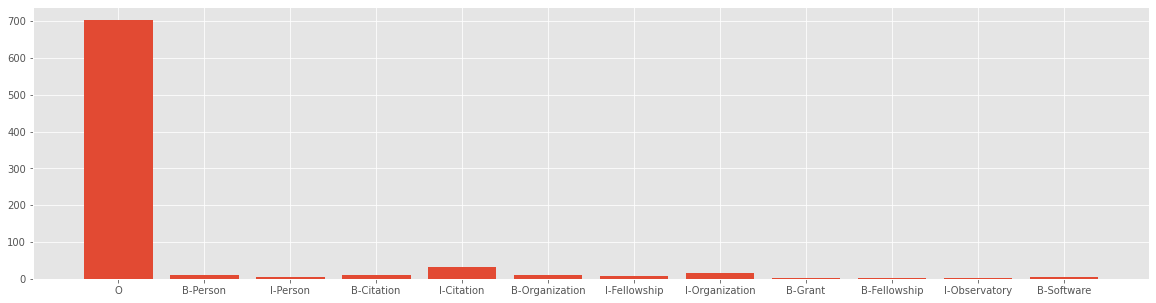

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter1.keys()),list(counter1.values()),)
plt.show()

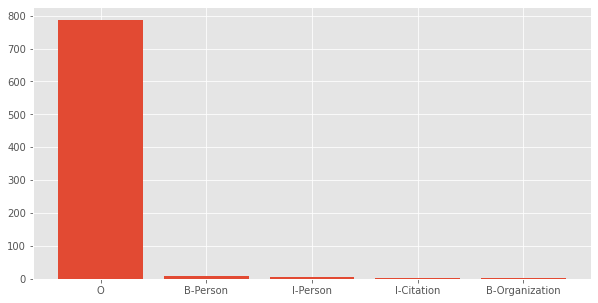

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(counter2.keys()),list(counter2.values()),)
plt.show()

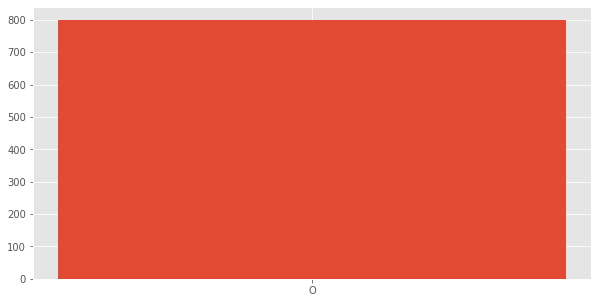

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(counter3.keys()),list(counter3.values()),)
plt.show()

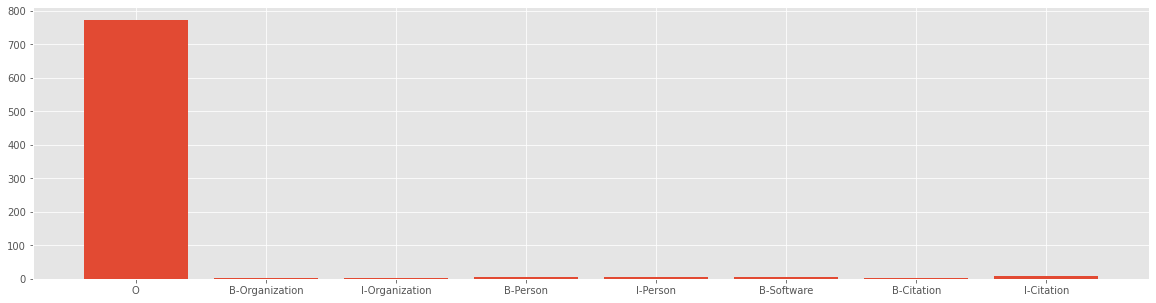

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter4.keys()),list(counter4.values()),)
plt.show()

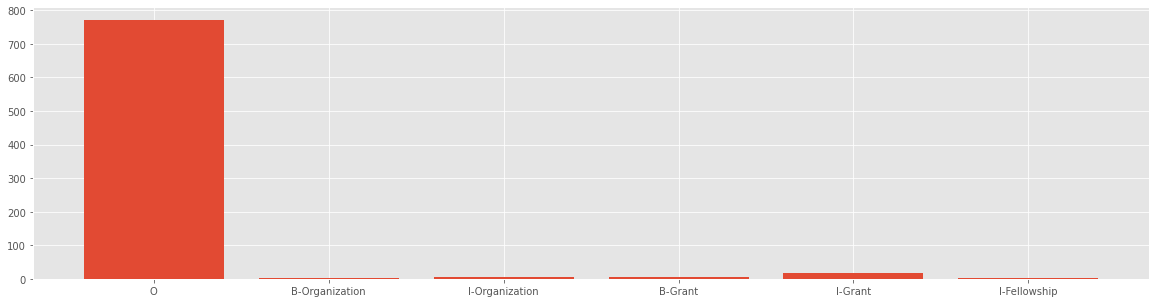

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter5.keys()),list(counter5.values()),)
plt.show()